<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/zero_initialization_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

#df = pd.read_csv('placement.csv')
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/ushape.csv')

Mounted at /content/drive


In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


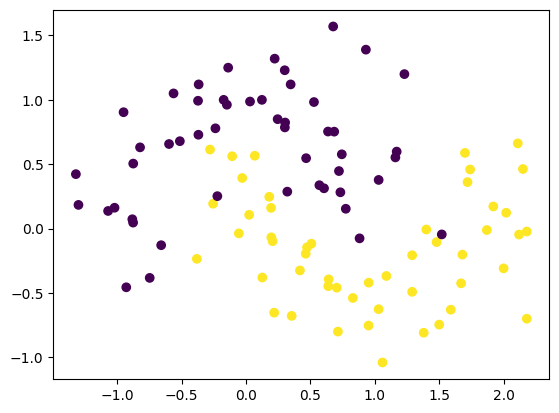

In [4]:
plt.scatter(df['X'],df['Y'], c = df['class'])

In [5]:
type(df['X'])

pandas.core.series.Series

In [6]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(2,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.get_weights()

[array([[-0.91299987,  0.71869683],
        [ 0.5531589 , -0.06047094]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.300475 ],
        [-0.8232308]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [11]:
# initial_weights[0] = np.zeros(model.get_weights()[0].shape)
# initial_weights[1] = np.zeros(model.get_weights()[1].shape)
# initial_weights[2] = np.zeros(model.get_weights()[2].shape)
# initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history= model.fit(X,Y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 124ms/step - loss: 0.9313 - accuracy: 0.5000 - val_loss: 0.8206 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.9271 - accuracy: 0.5000 - val_loss: 0.8178 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.9229 - accuracy: 0.5000 - val_loss: 0.8148 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.9186 - accuracy: 0.5000 - val_loss: 0.8119 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.9147 - accuracy: 0.5000 - val_loss: 0.8091 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.9107 - accuracy: 0.5000 - val_loss: 0.8063 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9070 - accuracy: 0.5000 - val_loss: 0.8036 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [16]:
model.get_weights()
#No update in weights and bias

[array([[0.5228631 , 0.5228631 ],
        [0.25491855, 0.25491855]], dtype=float32),
 array([0.3011871, 0.3011871], dtype=float32),
 array([[0.29270318],
        [0.29270318]], dtype=float32),
 array([0.25164863], dtype=float32)]

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

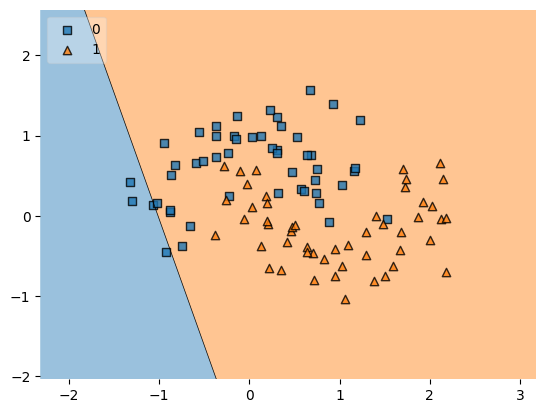

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

# tanh activation function

In [27]:
model = Sequential()

model.add(Dense(2,activation='tanh', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.get_weights()

[array([[-0.6391181 ,  1.071814  ],
        [-1.1715895 , -0.46272993]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.5869602],
        [-1.2960277]], dtype=float32),
 array([0.], dtype=float32)]

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

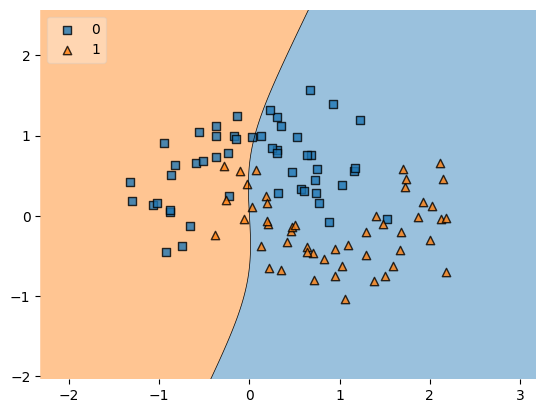

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

In [32]:
initial_weights = model.get_weights()

In [33]:
# initial_weights[0] = np.zeros(model.get_weights()[0].shape)
# initial_weights[1] = np.zeros(model.get_weights()[1].shape)
# initial_weights[2] = np.zeros(model.get_weights()[2].shape)
# initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [34]:
model.set_weights(initial_weights)

In [35]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

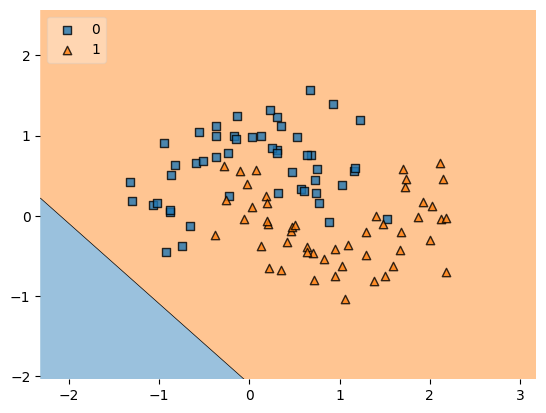

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history= model.fit(X,Y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 124ms/step - loss: 0.8523 - accuracy: 0.5000 - val_loss: 0.7754 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.8497 - accuracy: 0.5000 - val_loss: 0.7728 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.8471 - accuracy: 0.5000 - val_loss: 0.7702 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.8446 - accuracy: 0.5000 - val_loss: 0.7677 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.8421 - accuracy: 0.5000 - val_loss: 0.7653 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.8393 - accuracy: 0.5000 - val_loss: 0.7630 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.8370 - accuracy: 0.5000 - val_loss: 0.7606 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [40]:
model.get_weights()

[array([[0.71020156, 0.71020156],
        [0.2249083 , 0.2249083 ]], dtype=float32),
 array([0.26139706, 0.26139706], dtype=float32),
 array([[0.29985744],
        [0.29985744]], dtype=float32),
 array([0.2545853], dtype=float32)]

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

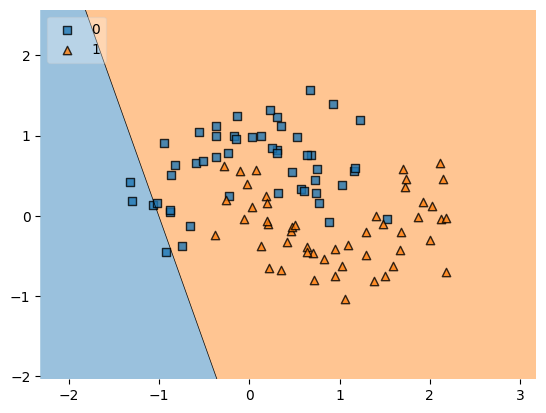

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)